In [1]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm
from results_analysis import results
from ImageTransformations import otsu, mnorm

## End2End Data

In [2]:
path_segmentation = "C:/Users/Usuario/Desktop/Uni/DataDaniMAPSIV/PSIV/02-Cancer_diagnosis/data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"


def otsu_norm_transf(x): return otsu(mnorm(x, -680, 340))

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((49, 14, 64, 64))
y_data_curated = np.zeros(49)
i = 0

for idx in tqdm.tqdm(range(len(diagonis))):
    data = diagonis[idx]
    m = data['ROI'].shape[0]//2   
    X_data_curated[i] = otsu_norm_transf(data["ROI"][m-7:m+7, :, :]).reshape((14, 1, 64, 64)).reshape((14, 64, 64))
    y_data_curated[i] = data['GT'] if type(data['GT']) != type([]) else data['GT'][0]
    i+=1




  0%|          | 0/49 [00:00<?, ?it/s]

Len Dataloader: 49 // Actual index: 0 // Len diagnosis path 47 // Len anonymous nodules 49


  2%|▏         | 1/49 [00:03<02:30,  3.14s/it]

Len Dataloader: 49 // Actual index: 1 // Len diagnosis path 47 // Len anonymous nodules 49


  4%|▍         | 2/49 [00:08<03:19,  4.25s/it]

Len Dataloader: 49 // Actual index: 2 // Len diagnosis path 47 // Len anonymous nodules 49


  6%|▌         | 3/49 [00:14<03:49,  5.00s/it]

Len Dataloader: 49 // Actual index: 3 // Len diagnosis path 47 // Len anonymous nodules 49


  8%|▊         | 4/49 [00:18<03:42,  4.95s/it]

Len Dataloader: 49 // Actual index: 4 // Len diagnosis path 47 // Len anonymous nodules 49


 10%|█         | 5/49 [00:26<04:25,  6.04s/it]

Len Dataloader: 49 // Actual index: 5 // Len diagnosis path 47 // Len anonymous nodules 49


 12%|█▏        | 6/49 [00:30<03:48,  5.30s/it]

Len Dataloader: 49 // Actual index: 6 // Len diagnosis path 47 // Len anonymous nodules 49


 14%|█▍        | 7/49 [00:35<03:36,  5.15s/it]

Len Dataloader: 49 // Actual index: 7 // Len diagnosis path 47 // Len anonymous nodules 49


 16%|█▋        | 8/49 [00:38<02:58,  4.36s/it]

Len Dataloader: 49 // Actual index: 8 // Len diagnosis path 47 // Len anonymous nodules 49


 18%|█▊        | 9/49 [00:42<02:47,  4.18s/it]

Len Dataloader: 49 // Actual index: 9 // Len diagnosis path 47 // Len anonymous nodules 49


 20%|██        | 10/49 [00:47<02:56,  4.53s/it]

Len Dataloader: 49 // Actual index: 10 // Len diagnosis path 47 // Len anonymous nodules 49


 20%|██        | 10/49 [00:52<03:23,  5.21s/it]


KeyboardInterrupt: 

## SVM

In [4]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

In [5]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+07,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
2,"{'C': 0.01, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
3,"{'C': 0.01, 'kernel': 'sigmoid'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,sigmoid,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
5,"{'C': 10.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+01,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
17,"{'C': 10000000000.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+10,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


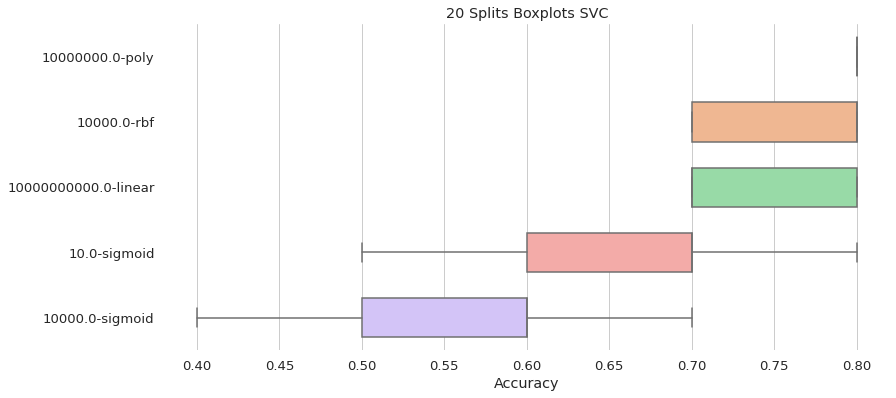

In [6]:
svm.boxplots(20)

In [7]:
results(X_data_curated,y_data_curated,'SVM', 5)

,tp,fp,tn,fn
split0,7,3,0,0
split1,9,1,0,0
split2,9,1,0,0
split3,9,1,0,0
split4,6,3,0,0


,accuracy,f1score,recall,precision
split0,0.700000,0.823529,1.0,0.700000
split1,0.900000,0.947368,1.0,0.900000
split2,0.900000,0.947368,1.0,0.900000
split3,0.900000,0.947368,1.0,0.900000
split4,0.666667,0.800000,1.0,0.666667


## KNN

In [8]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

In [9]:
knn.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.8,0.8,0.8,0.8,0.8,brute,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
29,"{'algorithm': 'brute', 'n_neighbors': 7, 'p': 2}",0.8,0.8,0.8,0.8,0.8,brute,7,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
22,"{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
21,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,7,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
20,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,7,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


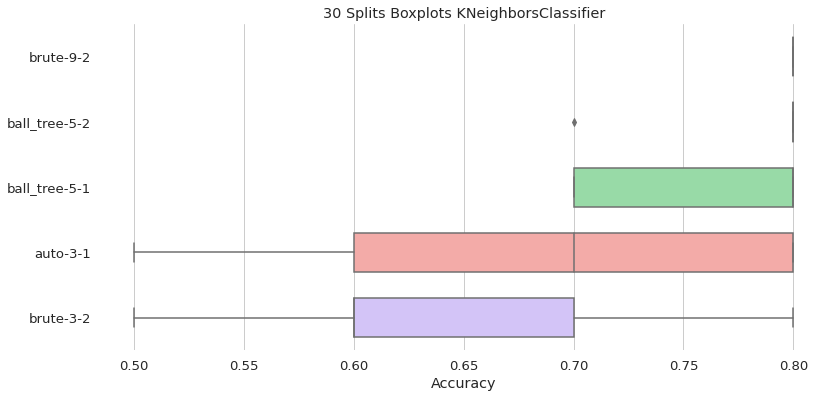

In [10]:
knn.boxplots(30)

In [11]:
results(X_data_curated,y_data_curated,'KNN', 5)

,tp,fp,tn,fn
split0,8,2,0,0
split1,5,5,0,0
split2,9,1,0,0
split3,9,0,0,1
split4,8,1,0,0


,accuracy,f1score,recall,precision
split0,0.800000,0.888889,1.0,0.800000
split1,0.500000,0.666667,1.0,0.500000
split2,0.900000,0.947368,1.0,0.900000
split3,0.900000,0.947368,0.9,1.000000
split4,0.888889,0.941176,1.0,0.888889


## Decision Tree

In [12]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

In [13]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
11,"{'criterion': 'entropy', 'max_features': 'log2...",0.6,0.8,0.6,0.7,0.8,entropy,log2,random,0.70,0.044721,"(0.5758335724151722, 0.8241664275848277)",0.287917
6,"{'criterion': 'entropy', 'max_features': 'auto...",0.6,0.8,0.7,0.6,0.9,entropy,auto,best,0.72,0.058310,"(0.5581067937646782, 0.8818932062353217)",0.279053
0,"{'criterion': 'gini', 'max_features': 'auto', ...",0.7,0.7,0.5,0.6,0.7,gini,auto,best,0.64,0.040000,"(0.528942168027637, 0.751057831972363)",0.264471
2,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.6,0.5,0.5,0.7,0.6,gini,sqrt,best,0.58,0.037417,"(0.476114908867192, 0.6838850911328079)",0.238057
7,"{'criterion': 'entropy', 'max_features': 'auto...",0.9,0.5,0.6,0.6,0.7,entropy,auto,random,0.66,0.067823,"(0.47169230340070467, 0.8483076965992952)",0.235846


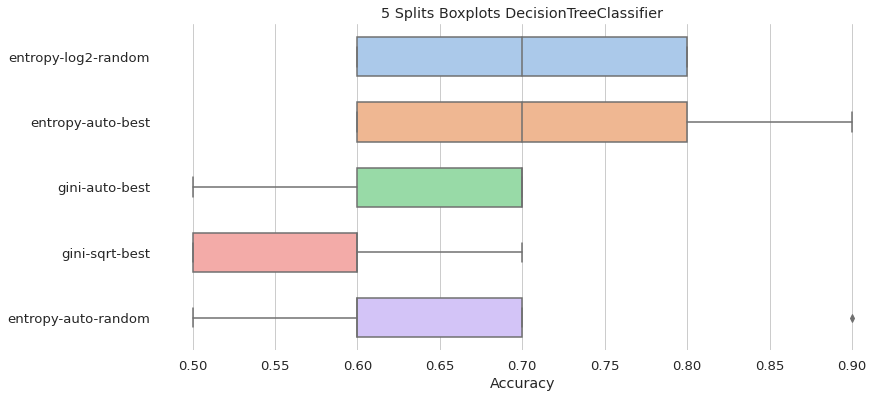

In [14]:
dt.boxplots(5)

In [15]:
results(X_data_curated,y_data_curated,'DT', 5)

,tp,fp,tn,fn
split0,5,2,0,3
split1,6,1,1,2
split2,6,4,0,0
split3,7,1,0,2
split4,6,0,0,3


,accuracy,f1score,recall,precision
split0,0.500000,0.666667,0.625000,0.714286
split1,0.700000,0.800000,0.750000,0.857143
split2,0.600000,0.750000,1.000000,0.600000
split3,0.700000,0.823529,0.777778,0.875000
split4,0.666667,0.800000,0.666667,1.000000


In [45]:
from results_analysis import results_analysis
import sklearn
def results_deep(X_data, y_data, MODEL_PATH, NSPLITS,epochs=20,LR=1e-3):
        
        kf = sklearn.model_selection.StratifiedKFold(n_splits = NSPLITS, shuffle = True)
        loss = torch.nn.BCELoss()
        data = {'tp':[] , 'fp': [] , 'tn': [] , 'fn': []}
        data2 = {'accuracy':[] , 'f1score': [] , 'recall': [] , 'precision': []}
        index = ['split'+str(x) for x in range(NSPLITS)]
        transform = T.Compose([T.Normalize(mean = (-640 ) , std=(380))])
        i=0
        for idx, idy in kf.split(X_data, y_data):
                model = CancerClassifier(MODEL_PATH).cuda()
                optimizer = AdamW(model.parameters(), lr = LR)
                for k in range(epochs):
                       print(f"Epoch {k} // split {i}")
                       for img,gt in zip(X_data[idx],y_data[idx]):
                               optimizer.zero_grad()
                               gt = torch.Tensor(1)
                               t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)
                               gt[0] = y
                               out = model(t)
                               #acc += 1 if (out>=0.5) == int(y) else 0 
                               loss_ = loss(out, gt.float().cuda())
                               if out>= 0.5 and gt ==0:
                                       loss_ *= 2
                               loss_.backward()
                final = []
                for img,gt in zip(X_data[idy],y_data[idy]):
                        out = model(t)
                        final.append(out.item() >= 0.5)
                df, cm  = results_analysis( y_data[idy], final)
                for x in data:
                    data[x].append(cm[x][0] )
                for x in data2:   
                    data2[x].append(df[x][0])
                i+=1
        data = pd.DataFrame(data)
        data.index = index
        data2 = pd.DataFrame(data2)
        data2.index = index
        from IPython.display import display, HTML

        css = """
        .output {
        flex-direction: row;
        }
        """

        HTML('<style>{}</style>'.format(css))
        display(data)
        display(data2)

In [46]:
results_deep(X_data_curated, y_data_curated, "C:/Users/Usuario/Desktop/Uni/DataDaniMAPSIV/PSIV/02-Cancer_diagnosis/code/unet_segment.pth", 5, LR=5e-3)

Epoch 0 // split 0


C:\Users\Usuario\AppData\Local\Temp/ipykernel_14888/1387352742.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)


Epoch 1 // split 0
Epoch 2 // split 0
Epoch 3 // split 0
Epoch 4 // split 0
Epoch 5 // split 0
Epoch 6 // split 0
Epoch 7 // split 0
Epoch 8 // split 0
Epoch 9 // split 0
Epoch 10 // split 0
Epoch 11 // split 0
Epoch 12 // split 0
Epoch 13 // split 0
Epoch 14 // split 0
Epoch 15 // split 0
Epoch 16 // split 0
Epoch 17 // split 0
Epoch 18 // split 0
Epoch 19 // split 0
Epoch 0 // split 1


C:\Users\Usuario\AppData\Local\Temp/ipykernel_14888/1387352742.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)


Epoch 1 // split 1
Epoch 2 // split 1
Epoch 3 // split 1
Epoch 4 // split 1
Epoch 5 // split 1
Epoch 6 // split 1
Epoch 7 // split 1
Epoch 8 // split 1
Epoch 9 // split 1
Epoch 10 // split 1
Epoch 11 // split 1
Epoch 12 // split 1
Epoch 13 // split 1
Epoch 14 // split 1
Epoch 15 // split 1
Epoch 16 // split 1
Epoch 17 // split 1
Epoch 18 // split 1
Epoch 19 // split 1
Epoch 0 // split 2


C:\Users\Usuario\AppData\Local\Temp/ipykernel_14888/1387352742.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)


Epoch 1 // split 2
Epoch 2 // split 2
Epoch 3 // split 2
Epoch 4 // split 2
Epoch 5 // split 2
Epoch 6 // split 2
Epoch 7 // split 2
Epoch 8 // split 2
Epoch 9 // split 2
Epoch 10 // split 2
Epoch 11 // split 2
Epoch 12 // split 2
Epoch 13 // split 2
Epoch 14 // split 2
Epoch 15 // split 2
Epoch 16 // split 2
Epoch 17 // split 2
Epoch 18 // split 2
Epoch 19 // split 2
Epoch 0 // split 3


C:\Users\Usuario\AppData\Local\Temp/ipykernel_14888/1387352742.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)


Epoch 1 // split 3
Epoch 2 // split 3
Epoch 3 // split 3
Epoch 4 // split 3
Epoch 5 // split 3
Epoch 6 // split 3
Epoch 7 // split 3
Epoch 8 // split 3
Epoch 9 // split 3
Epoch 10 // split 3
Epoch 11 // split 3
Epoch 12 // split 3
Epoch 13 // split 3
Epoch 14 // split 3
Epoch 15 // split 3
Epoch 16 // split 3
Epoch 17 // split 3
Epoch 18 // split 3
Epoch 19 // split 3


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\AppData\Local\Temp/ipykernel_14888/1387352742.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t,y = transform(torch.from_numpy(img)).reshape(14,1,64,64).float().cuda(), torch.tensor(gt)


Epoch 0 // split 4
Epoch 1 // split 4
Epoch 2 // split 4
Epoch 3 // split 4
Epoch 4 // split 4
Epoch 5 // split 4
Epoch 6 // split 4
Epoch 7 // split 4
Epoch 8 // split 4
Epoch 9 // split 4
Epoch 10 // split 4
Epoch 11 // split 4
Epoch 12 // split 4
Epoch 13 // split 4
Epoch 14 // split 4
Epoch 15 // split 4
Epoch 16 // split 4
Epoch 17 // split 4
Epoch 18 // split 4
Epoch 19 // split 4


,tp,fp,tn,fn
split0,8,2,0,0
split1,8,2,0,0
split2,8,2,0,0
split3,0,0,2,8
split4,8,1,0,0


,accuracy,f1score,recall,precision
split0,0.800000,0.888889,1.0,0.800000
split1,0.800000,0.888889,1.0,0.800000
split2,0.800000,0.888889,1.0,0.800000
split3,0.200000,0.000000,0.0,0.000000
split4,0.888889,0.941176,1.0,0.888889
